# AirBnB Dataset

In [1]:
import pandas as pd
import reverse_geocoder as rg
import pycountry
import os 

In [10]:
def get_week_type_from_filename(file_name):
    name = file_name.lower()
    if "weekday" in name:
        return "Weekday", 0
    elif "weekend" in name:
        return "Weekend", 1
    else:
        return None, None

def country_full_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

def process_folder(input_folder):
    all_dfs = []

    for file_name in os.listdir(input_folder):
        if file_name.endswith(".csv"):
            input_path = os.path.join(input_folder, file_name)
            print(f"Processing: {file_name}")
            df = pd.read_csv(input_path)

            week_type, week_type_id = get_week_type_from_filename(file_name)
            df['week_type'] = week_type
            df['week_type_id'] = week_type_id

            if {'lat', 'lng'}.issubset(df.columns):
                coordinates = list(zip(df['lat'], df['lng']))
                results = rg.search(coordinates, mode=1)
                df['city'] = [res['name'] for res in results]
                df['country'] = [country_full_name(res['cc']) for res in results]
            else:
                print(f" Skipped geo for {file_name} (lat/lng not found)")

            all_dfs.append(df)

    final_df = pd.concat(all_dfs, ignore_index=True)

    output_file = os.path.join(input_folder, "Airbnb_full_data.csv")
    final_df.to_csv(output_file, index=False)

    print(f"\nSaved merged file to: {output_file}")

def main():
    input_folder = r"D:\Hackathon_DA\Project 1\Airbnb Prices dataset"
    process_folder(input_folder)

if __name__ == "__main__":
    main()

Processing: amsterdam_weekdays.csv
Loading formatted geocoded file...
Processing: amsterdam_weekends.csv
Processing: athens_weekdays.csv
Processing: athens_weekends.csv
Processing: barcelona_weekdays.csv
Processing: barcelona_weekends.csv
Processing: berlin_weekdays.csv
Processing: berlin_weekends.csv
Processing: budapest_weekdays.csv
Processing: budapest_weekends.csv
Processing: lisbon_weekdays.csv
Processing: lisbon_weekends.csv
Processing: london_weekdays.csv
Processing: london_weekends.csv
Processing: paris_weekdays.csv
Processing: paris_weekends.csv
Processing: rome_weekdays.csv
Processing: rome_weekends.csv
Processing: vienna_weekdays.csv
Processing: vienna_weekends.csv

Saved merged file to: C:\Users\HP\Desktop\Hackathon_DA\Airbnb Prices dataset\Airbnb_full_data.csv


In [2]:
airbnb_dt = pd.read_csv(r"D:\Hackathon_DA\Project 1\Python\Airbnb_full_data.csv")
airbnb_dt.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_type,week_type_id,city,country
0,194.033698,Private room,False,True,2,False,1,0,10,93,...,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,Weekday,0,Landsmeer,Netherlands
1,344.245776,Private room,False,True,4,False,0,0,8,85,...,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,Weekday,0,Amsterdam,Netherlands
2,264.101422,Private room,False,True,2,False,0,1,9,87,...,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,Weekday,0,Diemen,Netherlands
3,433.529398,Private room,False,True,4,False,0,1,9,90,...,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,Weekday,0,Amsterdam,Netherlands
4,485.552926,Private room,False,True,2,True,0,0,10,98,...,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,Weekday,0,Amsterdam,Netherlands


In [20]:
airbnb_dt['country'].value_counts()

country
United Kingdom                   9993
France                           6688
Portugal                         5763
Greece                           5280
Holy See (Vatican City State)    4586
Italy                            4441
Hungary                          4022
Austria                          3537
Spain                            2833
Germany                          2484
Netherlands                      2080
Name: count, dtype: int64

In [42]:
airbnb_dt['country'].isnull().sum()

0

# Hotel Review Dataset

In [5]:
hotel_review = pd.read_csv(r"D:\Hackathon_DA\Project 1\Python\Hotel_Reviews.csv")
hotel_review.head()
hotel_review.shape

(515738, 17)

In [6]:
hotel_review = hotel_review.dropna(subset=['lat', 'lng'])
coordinates = list(zip(hotel_review['lat'], hotel_review['lng']))
results = rg.search(coordinates)
hotel_review['Country_Code'] = [res['cc'] for res in results]

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return "Unknown"

hotel_review['country'] = hotel_review['Country_Code'].apply(get_country_name)

hotel_review.head()

Loading formatted geocoded file...


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Country_Code,country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,NL,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,NL,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,NL,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,NL,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,NL,Netherlands


In [8]:
hotel_review.drop(columns=['Country_Code'], inplace=True, errors='ignore')
hotel_review.shape

(512470, 18)

In [9]:
hotel_review['country'].value_counts()

country
United Kingdom    262301
Spain              59942
France             59546
Netherlands        57214
Italy              37207
Austria            36260
Name: count, dtype: int64

In [10]:
hotel_review['country'].isnull().sum()

0

## Solution to Memory problem

In [11]:
cols_to_drop = ['Negative_Review', 'Positive_Review', 'Additional_Number_of_Scoring']
hotel_review = hotel_review.drop(columns=cols_to_drop)

In [13]:
hotel_review = hotel_review.drop_duplicates(subset=['Hotel_Name'])
print(hotel_review.shape)

(1475, 15)


In [17]:
hotel_review.to_csv(r'D:\Hackathon_DA\Project 1\Python\hotels.csv', index=False)

# Merge datasets

In [100]:
print(hotel_review.shape)
print(airbnb_dt.shape)

(1475, 15)
(51707, 23)


In [101]:
merged_data = airbnb_dt.merge(hotel_review, on="country", how="outer")

print("Merged DataFrame shape:", merged_data.shape)
print(merged_data.head())

Merged DataFrame shape: (9101442, 37)
      realSum        room_type  room_shared  room_private  person_capacity  \
0  250.566814  Entire home/apt        False         False                3   
1  250.566814  Entire home/apt        False         False                3   
2  250.566814  Entire home/apt        False         False                3   
3  250.566814  Entire home/apt        False         False                3   
4  250.566814  Entire home/apt        False         False                3   

   host_is_superhost  multi  biz  cleanliness_rating  \
0               True      1    0                  10   
1               True      1    0                  10   
2               True      1    0                  10   
3               True      1    0                  10   
4               True      1    0                  10   

   guest_satisfaction_overall  ...        Reviewer_Nationality  \
0                          99  ...               South Africa    
1                       

In [102]:
merged_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat_y,lng_y
0,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,South Africa,31.0,388.0,43.0,5.0,10.0,"[' Leisure trip ', ' Couple ', ' Standard Doub...",10 days,48.226406,16.360063
1,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,United States of America,23.0,1307.0,62.0,7.0,10.0,"[' Leisure trip ', ' Couple ', ' Superior Doub...",14 days,48.199613,16.377355
2,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,United Arab Emirates,4.0,532.0,29.0,9.0,9.6,"[' Leisure trip ', ' Family with young childre...",5 days,48.210524,16.368359
3,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,Russia,48.0,3078.0,19.0,24.0,7.1,"[' Business trip ', ' Solo traveler ', ' Stand...",3 days,48.206227,16.383377
4,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,Denmark,0.0,1350.0,39.0,34.0,7.5,"[' Business trip ', ' Family with young childr...",0 days,48.204086,16.372505


In [103]:
merged_data['country'].value_counts()

country
United Kingdom                   3997200
France                           3043040
Italy                             715001
Spain                             589264
Austria                           516402
Netherlands                       218400
Portugal                            5763
Greece                              5280
Holy See (Vatican City State)       4586
Hungary                             4022
Germany                             2484
Name: count, dtype: int64

In [105]:
cols_to_drop = ['lat_y', 'lng_y', 'lng_x','lat_x']
merged_data = merged_data.drop(columns=cols_to_drop)

In [106]:
merged_data.isnull().sum()

realSum                                           0
room_type                                         0
room_shared                                       0
room_private                                      0
person_capacity                                   0
host_is_superhost                                 0
multi                                             0
biz                                               0
cleanliness_rating                                0
guest_satisfaction_overall                        0
bedrooms                                          0
dist                                              0
metro_dist                                        0
attr_index                                        0
attr_index_norm                                   0
rest_index                                        0
rest_index_norm                                   0
week_type                                         0
week_type_id                                      0
city        

In [107]:
merged_data.to_csv(r"C:\Users\HP\Desktop\Hackathon_DA\merged_data.csv", index=False)

In [108]:
merged_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,Average_Score,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.1,Hotel Bellevue Wien,South Africa,31.0,388.0,43.0,5.0,10.0,"[' Leisure trip ', ' Couple ', ' Standard Doub...",10 days
1,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.6,Hotel Am Konzerthaus Vienna MGallery by Sofitel,United States of America,23.0,1307.0,62.0,7.0,10.0,"[' Leisure trip ', ' Couple ', ' Superior Doub...",14 days
2,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,9.3,Park Hyatt Vienna,United Arab Emirates,4.0,532.0,29.0,9.0,9.6,"[' Leisure trip ', ' Family with young childre...",5 days
3,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.0,Hilton Vienna,Russia,48.0,3078.0,19.0,24.0,7.1,"[' Business trip ', ' Solo traveler ', ' Stand...",3 days
4,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.9,Schlosshotel R mischer Kaiser,Denmark,0.0,1350.0,39.0,34.0,7.5,"[' Business trip ', ' Family with young childr...",0 days


# Replace nulls by web scraping

In [112]:
import pandas as pd
import time
import random
import os
from concurrent.futures import ThreadPoolExecutor
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [113]:
def setup_driver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-dev-shm-usage")
    chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36")
    return webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)


def scrape_all_hotels_in_city(location_tuple):
    city, country = location_tuple
    driver = setup_driver()
    found_hotels = []

    try:
        search_query = f"hotels in {city} {country}"
        url = f"https://www.google.com/search?q={search_query}&tbm=lcl"
        driver.get(url)
        time.sleep(4)

        elements = driver.find_elements(By.CSS_SELECTOR, "div.OSrXXb, span.OSrXXb")

        for el in elements:
            name = el.text.strip()
            if len(name) > 3 and name not in found_hotels:
                found_hotels.append(name)

    except Exception as e:
        print(f"Problem in city {city}: {e}")

    finally:
        driver.quit()

    if not found_hotels:
        found_hotels = [
            f"{city} Central Hotel",
            f"{city} Grand Inn",
            f"{city} Plaza"
        ]

    print(f"  Done from: {city} (found {len(found_hotels)} hotels)")
    return {"city": city, "country": country, "hotels": found_hotels}


def run_process():
    file_path = r"C:\Users\HP\Desktop\Hackathon_DA\merged_data.csv"

    if not os.path.exists(file_path):
        print("File not found! Please make sure merged_data.csv exists in the specified path.")
        return

    df = pd.read_csv(file_path)

    missing_mask = df['Hotel_Name'].isnull()
    unique_locations = df[missing_mask][['city', 'country']].drop_duplicates().values.tolist()

    if not unique_locations:
        print("There are no empty rows to fill.")
        return

    print(f"I will start collecting hotels for {len(unique_locations)} unique cities")
    print(" This process may take 10 to 15 minutes. Please wait.")

    with ThreadPoolExecutor(max_workers=3) as executor:
        all_results = list(executor.map(scrape_all_hotels_in_city, unique_locations))

    print("\n Distributing collected hotels across the 22,000 records")

    for result in all_results:
        city = result['city']
        hotel_list = result['hotels']

        city_mask = (df['city'] == city) & (df['Hotel_Name'].isnull())
        indices = df[city_mask].index.tolist()

        for i, idx in enumerate(indices):
            selected_hotel = hotel_list[i % len(hotel_list)]

            df.at[idx, 'Hotel_Name'] = selected_hotel
            df.at[idx, 'Hotel_Address'] = f"Main District, {city}"
            df.at[idx, 'Average_Score'] = round(random.uniform(7.5, 9.4), 1)

            df.at[idx, 'Review_Date'] = "2023-01-01"
            df.at[idx, 'Reviewer_Nationality'] = "International Guest"
            df.at[idx, 'Tags'] = "['Leisure trip']"

    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].fillna(0)

    df.to_csv(file_path, index=False)

    print("-" * 30)
    print("Congratulations! The file has been updated successfully.")
    print(f"Total processed rows: {len(df)}")
    print(f"Current number of null values in Hotel_Name: {df['Hotel_Name'].isnull().sum()}")


In [3]:
if __name__ == "__main__":
    run_process()

In [117]:
merged_data = pd.read_csv(r"C:\Users\HP\Desktop\Hackathon_DA\merged_data.csv")

In [120]:
merged_data.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,Average_Score,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.1,Hotel Bellevue Wien,South Africa,31.0,388.0,43.0,5.0,10.0,"[' Leisure trip ', ' Couple ', ' Standard Doub...",10 days
1,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.6,Hotel Am Konzerthaus Vienna MGallery by Sofitel,United States of America,23.0,1307.0,62.0,7.0,10.0,"[' Leisure trip ', ' Couple ', ' Superior Doub...",14 days
2,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,9.3,Park Hyatt Vienna,United Arab Emirates,4.0,532.0,29.0,9.0,9.6,"[' Leisure trip ', ' Family with young childre...",5 days
3,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.0,Hilton Vienna,Russia,48.0,3078.0,19.0,24.0,7.1,"[' Business trip ', ' Solo traveler ', ' Stand...",3 days
4,250.566814,Entire home/apt,False,False,3,True,1,0,10,99,...,8.9,Schlosshotel R mischer Kaiser,Denmark,0.0,1350.0,39.0,34.0,7.5,"[' Business trip ', ' Family with young childr...",0 days


In [128]:
merged_data.isnull().sum()

realSum                                       0
room_type                                     0
room_shared                                   0
room_private                                  0
person_capacity                               0
host_is_superhost                             0
multi                                         0
biz                                           0
cleanliness_rating                            0
guest_satisfaction_overall                    0
bedrooms                                      0
dist                                          0
metro_dist                                    0
attr_index                                    0
attr_index_norm                               0
rest_index                                    0
rest_index_norm                               0
week_type                                     0
week_type_id                                  0
city                                          0
country                                 

In [121]:
merged_data.duplicated().sum()

0

In [127]:
merged_data = merged_data.drop(columns=["days_since_review"])

In [129]:
merged_data.to_csv(r"C:\Users\HP\Desktop\Hackathon_DA\Final_Dataset.csv", index=False)

# Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
final_data = pd.read_csv(r"C:\Users\USER\Desktop\Hackathon_DA\Final_Dataset.csv")

In [15]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 300)
pd.set_option('display.expand_frame_repr', False)

final_data.sample(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,week_type,week_type_id,city,country,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags
497947,406.703597,Entire home/apt,False,False,4,True,0,1,10,97,1,1.345944,0.354778,145.252603,10.402033,218.587687,5.283180,Weekend,1,Vienna,Austria,Pelzgasse 1 15 Rudolfsheim F nfhaus 1150 Vienna Austria,8/3/2017,8.3,Arthotel ANA Westbahn,Slovakia,38.0,450.0,13.0,13.0,6.7,"[' Leisure trip ', ' Family with young children ', ' Superior Double Room ', ' Stayed 3 nights ']"
3715577,115.493419,Private room,False,True,2,True,1,0,10,99,1,4.581601,0.612821,140.104419,3.104742,405.184903,8.822016,Weekday,0,Rome,Italy,Corso Sempione 91 Fiera Milano City 20149 Milan Italy,7/30/2017,8.5,Enterprise Hotel Design Boutique,United States of America,19.0,1686.0,35.0,10.0,8.8,"[' Leisure trip ', ' Family with young children ', ' Triple Room ', ' Stayed 3 nights ']"
4513521,292.682927,Entire home/apt,False,False,3,False,0,1,8,94,1,6.096507,0.961198,96.879528,3.195403,120.897128,6.794738,Weekend,1,Moscavide,Portugal,"Main District, Moscavide",2023-01-01,9.3,Moscavide Grand Inn,International Guest,0.0,0.0,0.0,0.0,0.0,['Leisure trip']
8636943,214.727534,Private room,False,True,2,False,1,0,10,100,1,3.772136,0.723747,297.788318,20.700427,675.279435,12.086325,Weekend,1,Barbican,United Kingdom,8 12 Manchester Street Westminster Borough London W1U 4DG United Kingdom,7/29/2017,8.8,Ten Manchester Street Hotel,United Arab Emirates,72.0,478.0,2.0,5.0,5.4,"[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 3 nights ']"
1260419,243.032902,Private room,False,True,2,False,1,0,10,100,1,2.401378,0.126904,383.373783,18.662507,992.167874,58.299325,Weekday,0,Paris,France,153 Boulevard Saint Germain 6th arr 75006 Paris France,7/9/2017,8.6,Au Manoir Saint Germain,United Kingdom,42.0,616.0,22.0,10.0,8.8,"[' Leisure trip ', ' Group ', ' 2 rooms ', ' Stayed 1 night ']"
7594536,257.767116,Entire home/apt,False,False,3,False,1,0,8,90,1,9.818523,4.797618,115.549078,8.032267,241.839780,4.328511,Weekend,1,Thornton Heath,United Kingdom,7 Western Gateway Royal Victoria Dock Newham London E16 1AA United Kingdom,8/3/2017,8.5,Novotel London Excel,United Kingdom,32.0,1158.0,0.0,3.0,9.2,"[' Leisure trip ', ' Group ', ' Standard Queen Room with Sofa Bed ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"
3587933,97.491408,Private room,False,True,3,False,0,1,9,92,1,1.165252,0.088392,423.500952,9.384865,976.653393,21.264494,Weekday,0,Rome,Italy,Via Clerici 11 Milan City Center 20121 Milan Italy,8/3/2017,9.0,Hotel Clerici,Norway,64.0,517.0,24.0,2.0,7.1,"[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']"
8968693,218.490557,Private room,False,True,2,False,1,0,9,91,1,5.887892,1.819001,192.792590,13.401765,429.509876,7.687478,Weekend,1,Islington,United Kingdom,124 Clerkenwell Rd Camden London EC1R 5DJ United Kingdom,8/3/2017,7.8,The Bryson Hotel,United Kingdom,117.0,264.0,18.0,3.0,6.3,"[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ']"
230004,197.040881,Entire home/apt,False,False,4,False,1,0,9,90,2,3.151348,0.285183,107.579889,7.704412,156.438951,3.739786,Weekday,0,Vienna,Austria,K rntner Stra e 32 34 01 Innere Stadt 1010 Vienna Austria,8/3/2017,8.5,Austria Trend Hotel Astoria Wien,Cura ao,83.0,2279.0,21.0,3.0,8.3,"[' Leisure trip ', ' Couple ', ' 2 rooms ', ' Stayed 6 nights ', ' Submitted from a mobile device ']"
5666981,135.704038,Private room,False,True,2,False,0,1,7,78,1,4.302389,0.495185,369.151991,25.660165,693.270852,12.413593,Weekday,0,Bethnal Green,United Kingdom,Catherine Grove Greenwich Greenwich Lond

In [19]:
final_data.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'week_type', 'week_type_id',
       'city', 'country', 'Hotel_Address', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags'],
      dtype='object')

In [25]:
final_data.shape

(9101442, 32)

In [29]:
final_data.nunique()

realSum                                       10497
room_type                                         3
room_shared                                       2
room_private                                      2
person_capacity                                   5
host_is_superhost                                 2
multi                                             2
biz                                               2
cleanliness_rating                                9
guest_satisfaction_overall                       53
bedrooms                                         10
dist                                          51706
metro_dist                                    51706
attr_index                                    51705
attr_index_norm                               51687
rest_index                                    51704
rest_index_norm                               51688
week_type                                         2
week_type_id                                      2
city        

In [35]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9101442 entries, 0 to 9101441
Data columns (total 32 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   realSum                                     float64
 1   room_type                                   object 
 2   room_shared                                 bool   
 3   room_private                                bool   
 4   person_capacity                             int64  
 5   host_is_superhost                           bool   
 6   multi                                       int64  
 7   biz                                         int64  
 8   cleanliness_rating                          int64  
 9   guest_satisfaction_overall                  int64  
 10  bedrooms                                    int64  
 11  dist                                        float64
 12  metro_dist                                  float64
 13  attr_index                 

In [39]:
final_data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,week_type_id,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score
count,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06,9.101442e+06
mean,3.516166e+02,2.921972e+00,2.742287e-01,3.210269e-01,9.263609e+00,9.158081e+01,1.088089e+00,3.919513e+00,6.440835e-01,3.289243e+02,1.771582e+01,6.980651e+02,2.292959e+01,5.250211e-01,8.470123e+00,3.413927e+01,1.245722e+03,3.299534e+01,7.377863e+00,8.256805e+00
std,4.022152e+02,1.239766e+00,4.461248e-01,4.668711e-01,1.051512e+00,9.981870e+00,6.056691e-01,2.500132e+00,9.390501e-01,1.918573e+02,1.052377e+01,3.947961e+02,1.834767e+01,4.993736e-01,5.616174e-01,3.965908e+01,1.362334e+03,3.279330e+01,1.088967e+01,1.780486e+00
min,3.477934e+01,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+01,0.000000e+00,1.504452e-02,2.301068e-03,1.515220e+01,9.263009e-01,1.957692e+01,5.927569e-01,0.000000e+00,5.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.808603e+02,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,8.800000e+01,1.000000e+00,2.067214e+00,2.053341e-01,1.949411e+02,1.074133e+01,4.244095e+02,8.482204e+00,0.000000e+00,8.100000e+00,1.000000e+01,3.900000e+02,1.200000e+01,1.000000e+00,7.100000e+00
50%,2.666792e+02,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,9.400000e+01,1.000000e+00,3.571066e+00,3.469668e-01,2.883603e+02,1.535368e+01,6.389347e+02,1.589826e+01,1.000000e+00,8.500000e+00,2.600000e+01,8.300000e+02,2.500000e+01,3.000000e+00,8.800000e+00
75%,4.170939e+02,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,9.900000e+01,1.000000e+00,5.097135e+00,6.312018e-01,4.173248e+02,2.234618e+01,9.027930e+02,3.361197e+01,1.000000e+00,8.900000e+00,4.300000e+01,1.593000e+03,4.300000e+01,9.000000e+00,9.600000e+00
max,1.854545e+04,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+01,2.528456e+01,1.427358e+01,4.513563e+03,1.000000e+02,6.696157e+03,1.000000e+02,1.000000e+00,9.800000e+00,3.970000e+02,1.667000e+04,2.790000e+02,1.680000e+02,1.000000e+01


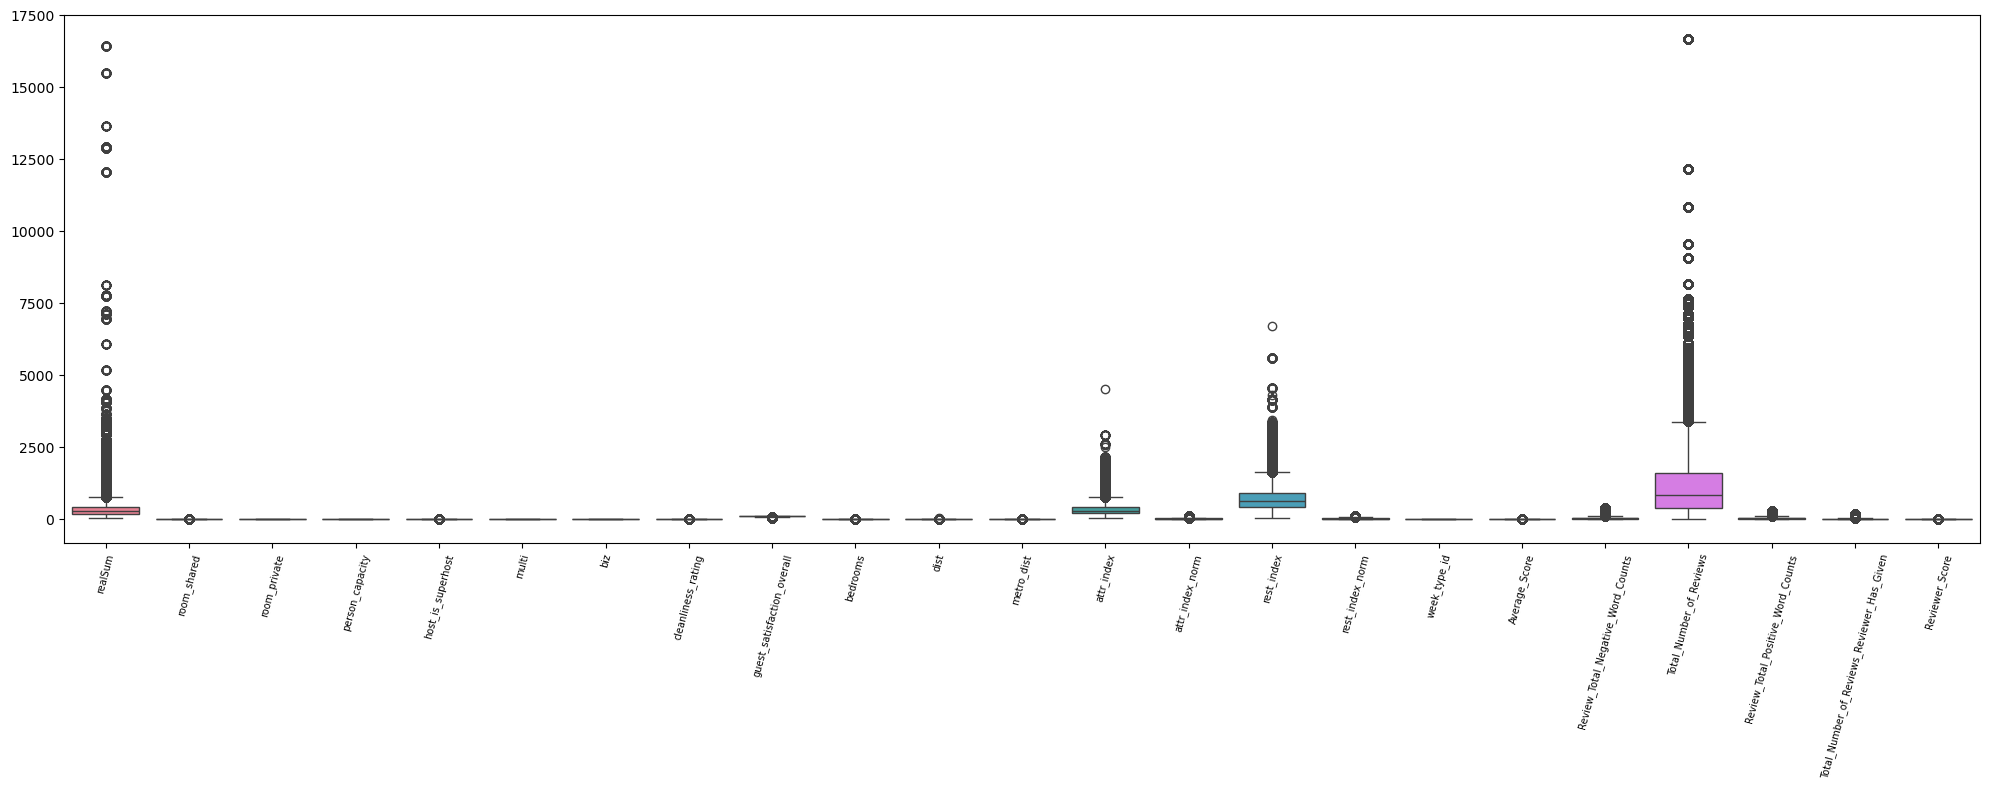

In [41]:
#cheching the outliers
sample_df = final_data.sample(n=1_000_000, random_state=42)

plt.figure(figsize=(20,8))
sns.boxplot(data=sample_df)

plt.xticks(rotation=75, fontsize=7)
plt.tight_layout()
plt.show()

In [49]:
####################################################### The Most important insight    ########################################################
numeric_cols = final_data.select_dtypes(include=['int64', 'float64', 'bool']).columns
corr_with_price = final_data[numeric_cols].corr()['realSum'].drop('realSum')

corr_with_price = corr_with_price.sort_values(ascending=False) 
corr_df = corr_with_price.reset_index()
corr_df.columns = ['feature', 'correlation_with_price']

print(corr_df.head(5))   
print("\n")
print(corr_df.tail(5))   

           feature  correlation_with_price
0  person_capacity                0.322543
1         bedrooms                0.291200
2  attr_index_norm                0.264965
3       attr_index                0.202880
4       rest_index                0.174147


         feature  correlation_with_price
17   room_shared               -0.041852
18         multi               -0.050350
19    metro_dist               -0.106226
20          dist               -0.129705
21  room_private               -0.265256


In [53]:
# Calculate the number of unique countries in the dataset
num_countries = final_data['country'].nunique()
num_countries

11

In [57]:
# Calculate the average (mean) of person_capacity
avg_person_capacity = final_data['person_capacity'].mean()

# Round the result to the nearest integer
# round() rounds to the nearest whole number
avg_person_capacity_rounded = round(avg_person_capacity)

# Display the rounded result
avg_person_capacity_rounded

3

In [59]:
# Calculate average price
avg_price = final_data['realSum'].mean()

# Round to nearest integer
avg_price_rounded = round(avg_price)

# Format with thousand separator and add Euro symbol
avg_price_euro = f"€ {avg_price_rounded:,.0f}"

# Display the result
avg_price_euro

'€ 352'

In [63]:
# Calculate the average of Reviewer_Score
avg_reviewer_score = final_data['Reviewer_Score'].mean()

# Round to 1 decimal places for a cleaner KPI display
avg_reviewer_score_rounded = round(avg_reviewer_score, 1)

# Display the rounded result (single value for a KPI/Card)
avg_reviewer_score_rounded

8.3

In [65]:
# Group by country and calculate average realSum
avg_price_by_country = final_data.groupby('country')['realSum'].mean()

# Find the country with the highest average price
most_expensive_country = avg_price_by_country.idxmax()
most_expensive_avg_price = avg_price_by_country.max()

# Round the average price to nearest integer
most_expensive_avg_price_rounded = round(most_expensive_avg_price)

# Print result (ready to show in a KPI card)
most_expensive_country, most_expensive_avg_price_rounded

('Netherlands', 573)

In [67]:
# Group by country and calculate average realSum
avg_price_by_country = final_data.groupby('country')['realSum'].mean()

# Find the country with the lowest average price
cheapest_country = avg_price_by_country.idxmin()
cheapest_avg_price = avg_price_by_country.min()

# Round to nearest integer
cheapest_avg_price_rounded = round(cheapest_avg_price)

# Output (Country + Avg price)
cheapest_country, cheapest_avg_price_rounded

('Greece', 152)

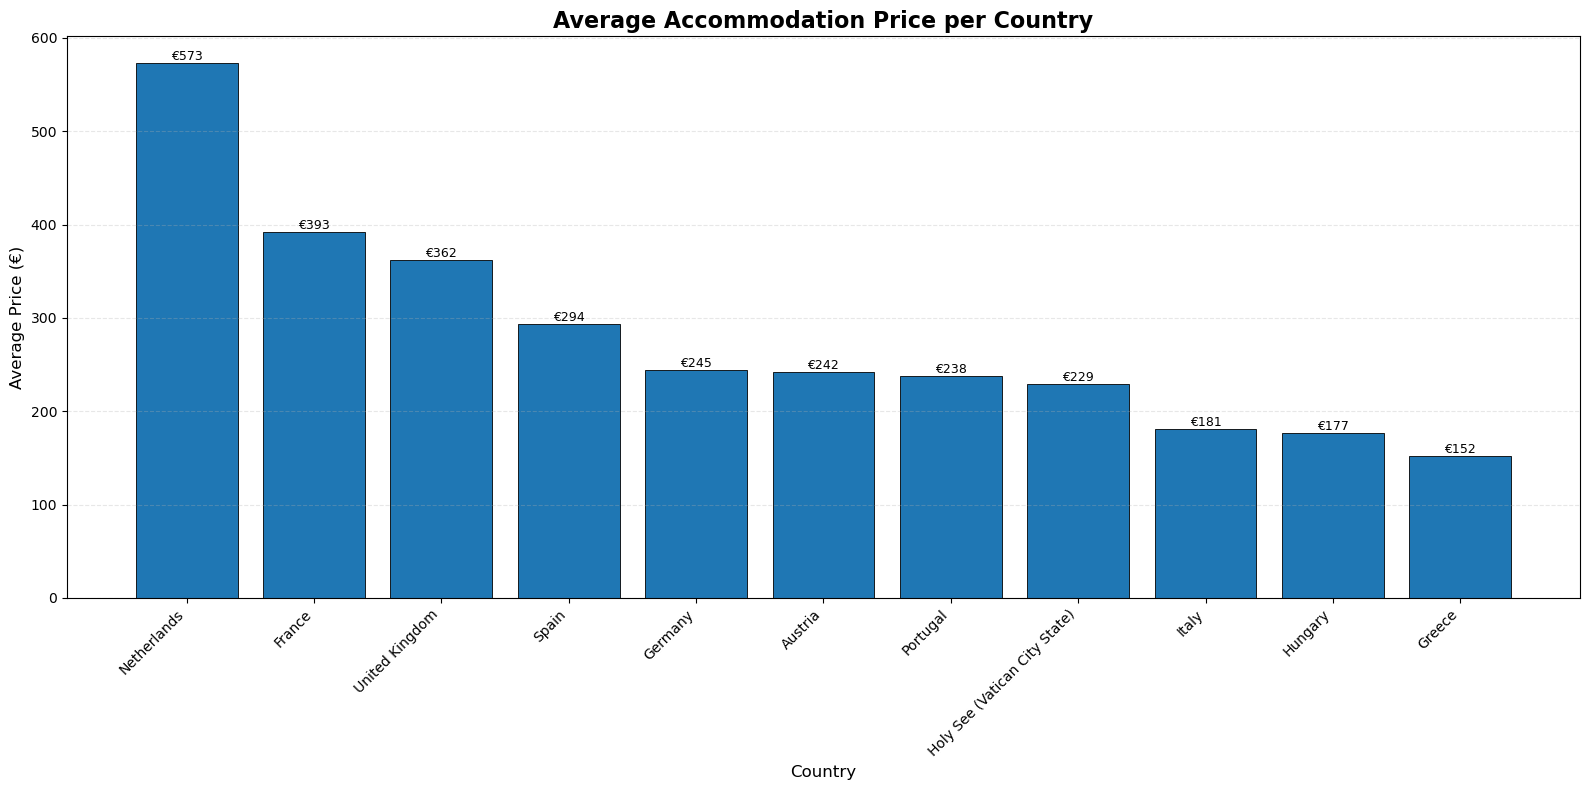

In [71]:
import matplotlib.pyplot as plt

avg_price_by_country = final_data.groupby('country')['realSum'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))

bars = plt.bar(avg_price_by_country.index, avg_price_by_country.values, edgecolor='black', linewidth=0.6)

plt.title("Average Accommodation Price per Country", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Price (€)", fontsize=12)

plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"€{height:,.0f}",
        ha='center', va='bottom', fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

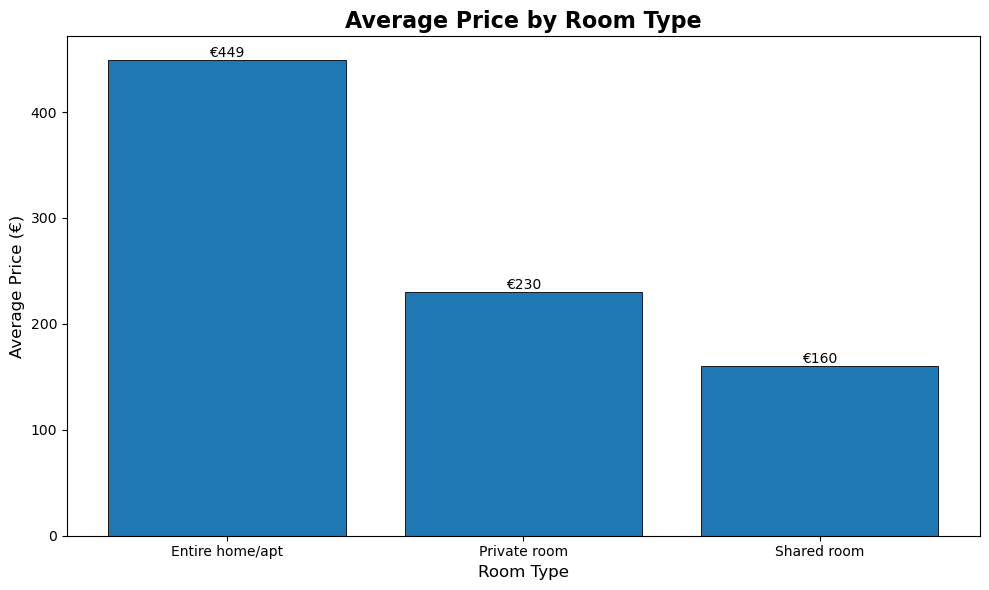

In [73]:
import matplotlib.pyplot as plt

# Calculate average price per room_type
avg_price_by_room = final_data.groupby('room_type')['realSum'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))

bars = plt.bar(avg_price_by_room.index, avg_price_by_room.values, edgecolor='black', linewidth=0.6)

plt.title("Average Price by Room Type", fontsize=16, fontweight='bold')
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Price (€)", fontsize=12)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"€{height:,.0f}",
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

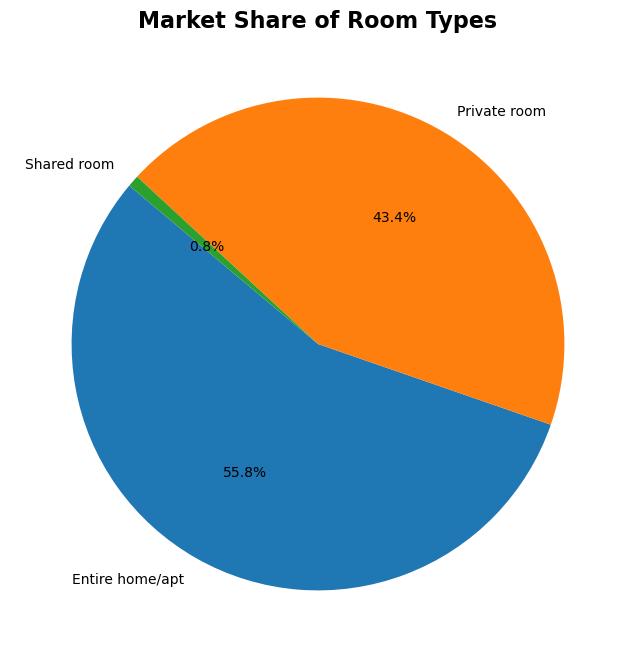

In [75]:
import matplotlib.pyplot as plt

# Count how many listings for each room_type
room_counts = final_data['room_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    room_counts.values,
    labels=room_counts.index,
    autopct='%1.1f%%',      # show percentages
    startangle=140
)

plt.title("Market Share of Room Types", fontsize=16, fontweight='bold')
plt.show()

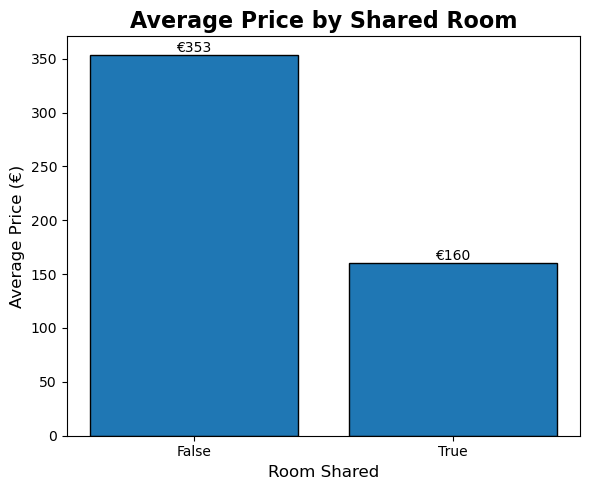

In [77]:
import matplotlib.pyplot as plt

# Average price by room_shared (True/False)
avg_price_shared = final_data.groupby('room_shared')['realSum'].mean()

plt.figure(figsize=(6, 5))

bars = plt.bar(avg_price_shared.index.astype(str), avg_price_shared.values, edgecolor='black')

plt.title("Average Price by Shared Room", fontsize=16, fontweight='bold')
plt.xlabel("Room Shared", fontsize=12)
plt.ylabel("Average Price (€)", fontsize=12)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"€{height:,.0f}",
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

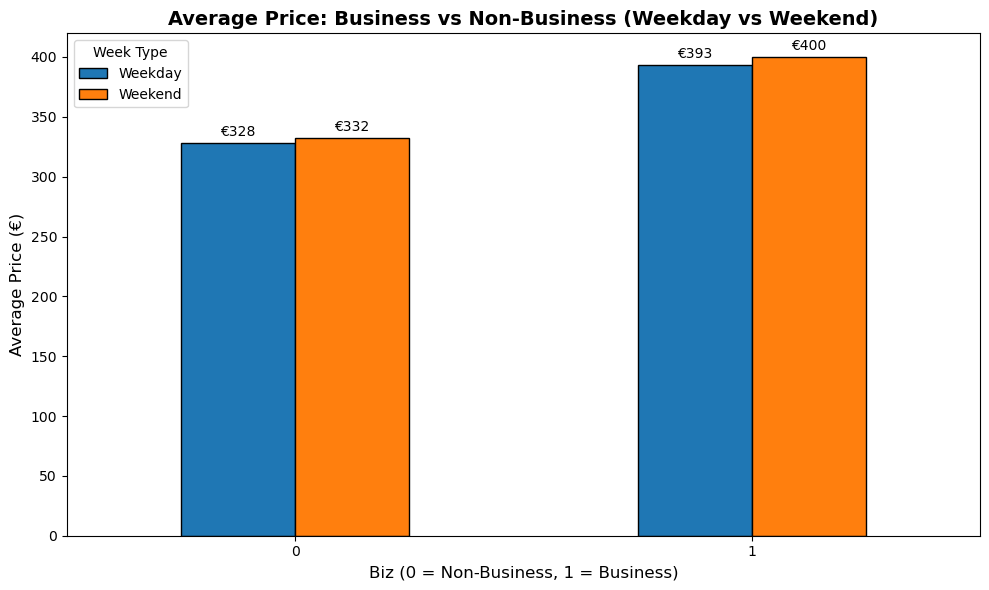

In [79]:
import matplotlib.pyplot as plt

# 1) Calculate average price for each combination of biz and week_type
avg_price = final_data.groupby(['biz', 'week_type'])['realSum'].mean().reset_index()

# 2) Pivot to make it easier for plotting
pivot = avg_price.pivot(index='biz', columns='week_type', values='realSum')

# 3) Plot
pivot.plot(kind='bar', figsize=(10, 6), edgecolor='black')

plt.title("Average Price: Business vs Non-Business (Weekday vs Weekend)", fontsize=14, fontweight='bold')
plt.xlabel("Biz (0 = Non-Business, 1 = Business)", fontsize=12)
plt.ylabel("Average Price (€)", fontsize=12)

# Data labels
for container in plt.gca().containers:
    plt.bar_label(container, labels=[f"€{x:,.0f}" for x in container.datavalues], padding=3)

plt.xticks(rotation=0)
plt.legend(title="Week Type")
plt.tight_layout()
plt.show()

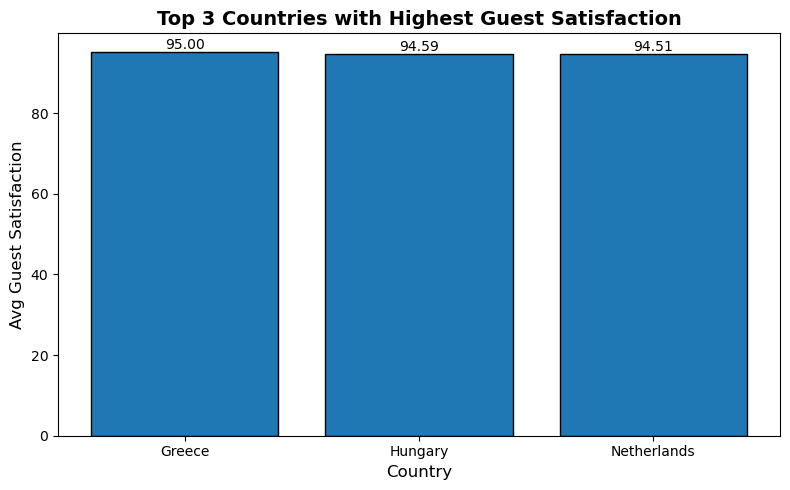

In [81]:
import matplotlib.pyplot as plt

# 1) Average guest satisfaction per country
avg_satisfaction = final_data.groupby('country')['guest_satisfaction_overall'].mean()

# 2) Top 3 countries
top3 = avg_satisfaction.sort_values(ascending=False).head(3)

# 3) Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(top3.index, top3.values, edgecolor='black')

plt.title("Top 3 Countries with Highest Guest Satisfaction", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Avg Guest Satisfaction", fontsize=12)

# Data labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

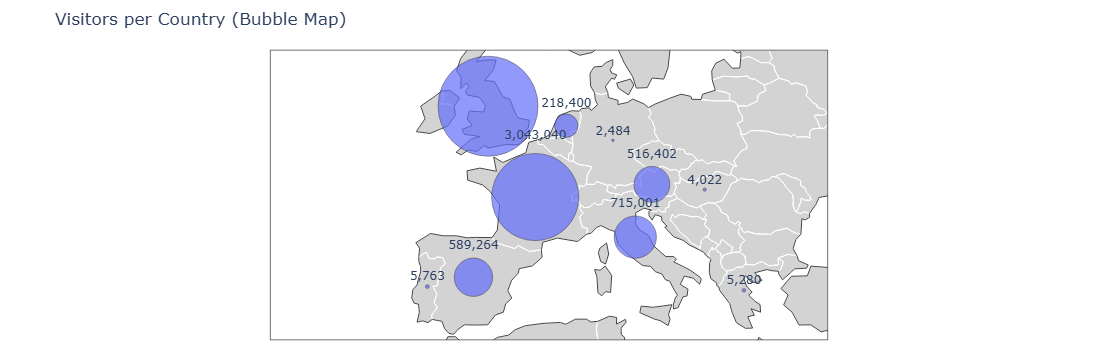

In [85]:
import plotly.express as px

# Count visitors per country
visitors_per_country = final_data['country'].value_counts().reset_index()
visitors_per_country.columns = ['country', 'visitors']

# Bubble map
fig = px.scatter_geo(
    visitors_per_country,
    locations="country",
    locationmode="country names",
    size="visitors",
    hover_name="country",
    projection="natural earth",
    title="Visitors per Country (Bubble Map)"
)

# Make bubbles look like circles + labels
fig.update_traces(
    marker=dict(
        sizemode="area",
        sizeref=2.*visitors_per_country["visitors"].max()/(100**2),
        line=dict(width=0.5, color="black"),
        opacity=0.7,
    ),
    text=visitors_per_country["visitors"].map(lambda x: f"{x:,}"),
    textposition="top center",
    mode="markers+text"
)

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor="lightgray",
        showcountries=True,
        countrycolor="white"
    ),
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()